# TP Adversarial attacks

In this tutorial, we will carry out adversarial attacks on a neural network trained to identify MNIST digits. An adversarial attack consists of finding a very small perturbation of the network's inputs (a change in the image) that fools the neural network. We will then reinforce the training to try to make the neural network robust to these attacks.

In this practice session, some cells must be filled according to the instructions. They are identified by the word **Exercise**. You will perform the **Verifications** yourselves in most cases, by watching if the algorithm correctly works and converges.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Below we import the required libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf

## Data definition

The following cell loads the MNIST data

In [3]:
#DO NOT MODIFY

(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**Exercise**: Apply data normalization (division by 255) and change the output data into categorial vectors (one hot encoding with keras.utils.categorical). If you use a Convolutional architecture (CNN), do not forget to add a new axis to the input data, that represents the number of channels (the number of channels is 1 here for grey-scale images).

In [4]:
#TO DO

X_train = X_train / 255.0

X_test = X_test / 255.0

Y_train_cat = keras.utils.to_categorical(Y_train, num_classes=10)

Y_test_cat = keras.utils.to_categorical(Y_test, num_classes=10)

## Keras model

**Exercise**: Load the pre-trained model that you want to attack (or build and train a new model). Call it "my_model". You can load a model by using keras.models.load_model.

In [5]:
model = keras.models.load_model("/content/drive/MyDrive/model_CNN_example.keras")


**Exercise**: Display your architecture by calling my_model.summary()

In [6]:
#TO DO
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 4)      │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 4)      │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 4)        │           404 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 4)        │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,004 (320.33 KB)

 Trainable params: 27,158 (106.09 KB)

 Non-trainable params: 528 (2.06 KB)

 Optimizer params: 54,318 (212.18 KB)

**Verification**: If there is no error, everything should be ok.

## Model predictions

**Exercise**: Apply the model for the predictions on the test set.

In [ ]:
Y_pred_test = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


**Exercise**: Extract the predicted labels of the network, that correspond to the classes with the highest predicted probabilites. The function np.argmax will be useful (take care of the "axis").

In [ ]:
Y_test_pred_lab = np.argmax(Y_pred_test, axis=1)

**Exercise**: Compute the accuracy on the test set, and remember it carefully.

In [ ]:
#TO DO
accuracy = np.sum(Y_test_pred_lab == Y_test) / Y_test.shape[0]
print("Test accuracy: {:.2f} %".format(accuracy * 100))

Test accuracy: 99.09 %


The following cell displays randomly some of the test examples and the associated predictions.

Text(0, 0.5, 'Network output')

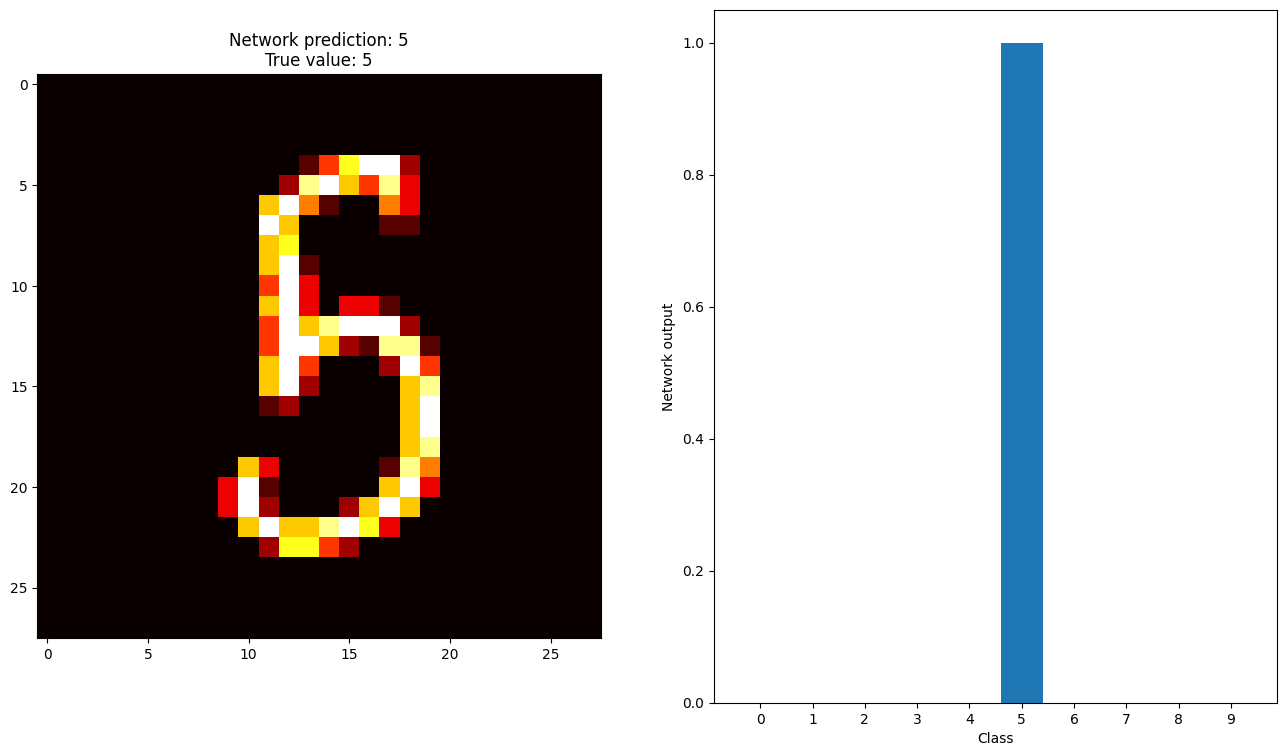

In [ ]:
r = np.random.randint(X_test.shape[0])

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[r,:,:],cmap = "hot")
plt.title("Network prediction: " + str(Y_test_pred_lab[r]) + "\nTrue value: " + str(Y_test[r]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_pred_test[r],tick_label = np.arange(10))
plt.xlabel("Class")
plt.ylabel("Network output")


**Exercise**: Adapt the previous code to displays random wrong predictions of the network. The function np.where should be useful.

Number of wrong predictions:  91


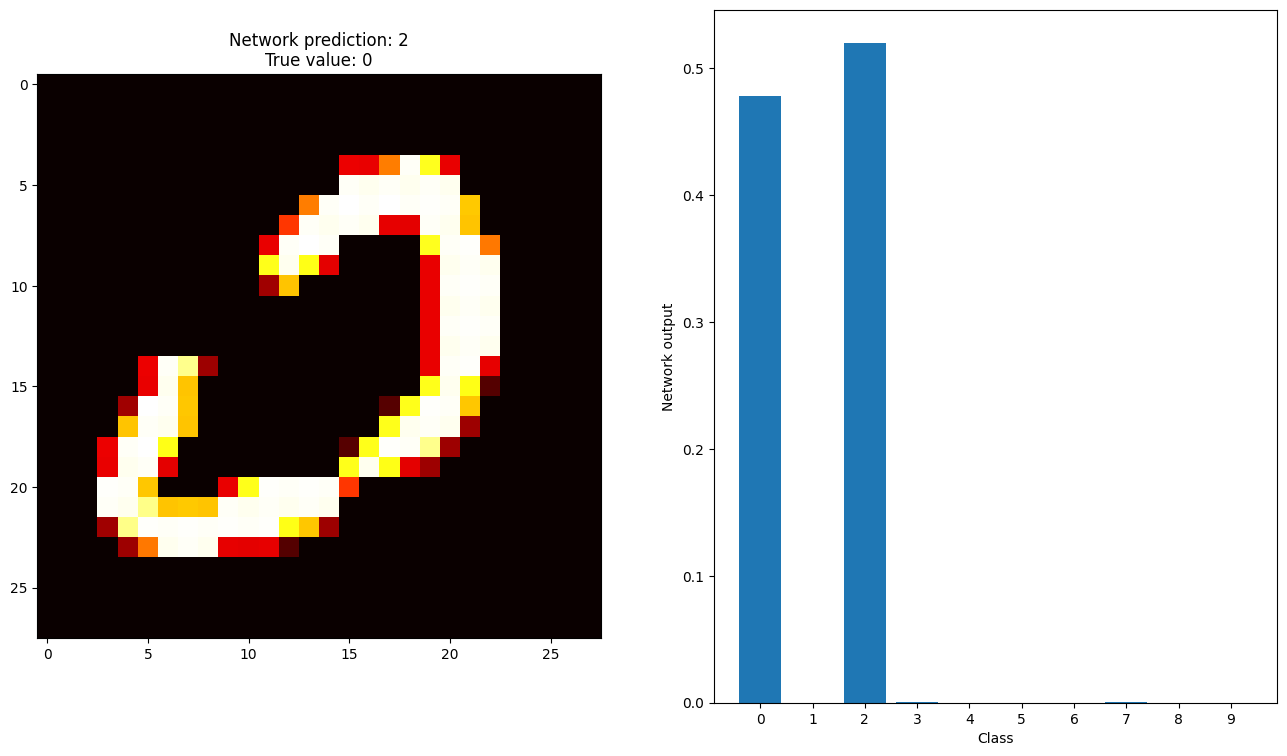

In [ ]:
#TO DO
wrong_predictions = np.where(Y_test_pred_lab != Y_test)[0]
print("Number of wrong predictions: ", len(wrong_predictions))

r = np.random.choice(wrong_predictions)
figure = plt.figure(figsize = (16,9))
ax1 = plt.subplot(121)
ax1.imshow(X_test[r,:,:],cmap = "hot")
plt.title("Network prediction: " + str(Y_test_pred_lab[r]) + "\nTrue value: " + str(Y_test[r]))
ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_pred_test[r],tick_label = np.arange(10))
plt.xlabel("Class")
plt.ylabel("Network output")
plt.show()



## Adversarial attacks

We will now attack our network by computing adversarial attacks on the input data. Computing an adversarial attack on an example $x$ for a neural network $f_{\theta}$ consists in finding a perturbation $\delta$ that maximises the loss function $L$ on the attacked example $x + \delta$, according to the expected label $y$, with the constraint that $\delta$ is small (with a norm lower than $\varepsilon$). Mathematically:

\begin{equation}
\delta^{*} = \underset{\lVert \delta \rVert < \varepsilon}{\mathrm{argmax}}~L(f_{\theta}(x + \delta),y)
\end{equation}

where $\delta^{*}$ is the optimal attack.

### Computation of the gradient of the loss function according to the input

Conventional attack methods consist of calculating the gradient of the cost function with respect to the inputs and then 'raising' this gradient.

It is therefore first necessary to calculate this gradient for each input $x$ :

\begin{equation}
\nabla_x L(f_\theta(x),y)
\end{equation}

**Exercise**: The Tensorflow library has the tools needed to calculate the gradient of one quantity with respect to another quantity, as long as the links between these two quantities are Tensorflow functions. A tensorflow function can be, for example, tf.math.log, tf.math.exp, a simple addition of two quantities, a product, a power... or even a tensorflow (or keras) neural network!
The exercise then consists of completing the following function which, for a given input (or set of inputs), a given label and a given model, returns the gradient of the loss function (in this case Categorical CrossEntropy) relative to the inputs.

To complete the picture:
- In the "with tf.GradientTape() as tape" part, we track the inputs variable (it is relative to this variable that we calculate the gradient). This is done using the tape.watch(inputs) command.
- We now need to complete the code, still respecting the indentation of gradient.tape, to obtain the loss value associated with these inputs and labels:
    - Perform the prediction on the inputs (use model(inputs) and not model.predict(inputs)!, because model(inputs) is a tensorflow operation and model.predict(inputs) is a numpy operation which is not tracked by the gradient).
    - Once the prediction has been made, calculate the loss between this prediction and the expected label using loss_cross, defined at the start of the cell.
- Then exit the GradientTape indentation and return the gradient of the loss calculated in this way relative to the inputs using tape.gradient(loss,inputs).
    

In [7]:
loss_cross = tf.keras.losses.CategoricalCrossentropy()

def Calculgradient(inputs, label, model):

    label = tf.reshape(label,(label.shape[0],10))

    with tf.GradientTape() as tape:

        tape.watch(inputs)

        prediction = model(inputs)
        loss = loss_cross(label, prediction)

    gradient = tape.gradient(loss, inputs)

    return gradient


###  FGSM attack (Fast Gradient Signed Method)

The FGSM attack consists of considering only the sign of each gradient component to find the direction of the attack. This is a very fast attack (a single iteration) and in this case the perturbation is simply:

\begin{equation}
\delta = \lambda~\mathrm{sign}( \nabla_x L(f_\theta(x),y))
\end{equation}

In this case, $\lambda$ is a coefficient which can be used to select the amplitude of the perturbation. The smaller the $\lambda$, the more indiscernible but potentially ineffective the attack.

**Exercise**: The purpose of the function below is to calculate the perturbation to be applied to each attack using the FGSM method: this perturbation is calculated for inputs, with expected outputs noted label, for a model noted model and with a $\lambda$ coefficient noted lambd. Use the Calculgradient function defined earlier, and the tf.math.sign function may be useful.

Here the inputs are not considered as tf tensors and the labels are not categorical, hence the first two pre-filled lines.

In [8]:
def delta_fgsm(inputs, label, model, lambd):

    inputs_tf = tf.constant(inputs,dtype = "float32")
    lab = keras.utils.to_categorical(label,num_classes=10)

    gradient = Calculgradient(inputs_tf, lab, model)
    delta = lambd * tf.sign(gradient)

    return delta

**Exercise**: Complete the code below to perform the perturbation prediction on the test data set using delta_fgsm. Here we choose a perturbation amplitude equal to 1 and we will modify the amplitude later when we apply it to the images.

In [ ]:
alpha = 1.

delta = delta_fgsm(X_test, Y_test, model, alpha)

pred_cur = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Exercise**: Apply the delta perturbation calculated in the previous cell to X_test. The $\lambda$ term is used to adjust its amplitude (the perturbation will then be $\lambda \times \delta$). Once the adversarial image has been calculated, its limits may exceed the limit intensities of the MNIST images (between 0 and 1 with our normalisation). Use the np.clip function to put the images back between 0 and 1. Finally, perform the model prediction on the adversarial images.

Run the following cell to see the effect of the perturbation on your data and prediction.

You can change the lambd value to see the effect of the amplitude of the perturbation.

In [ ]:
lambd = 0.2

#TO DO

x_adv = X_test + lambd * tf.sign(delta)

x_adv = np.clip(x_adv, 0., 1.)

pred_adv = model.predict(x_adv)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


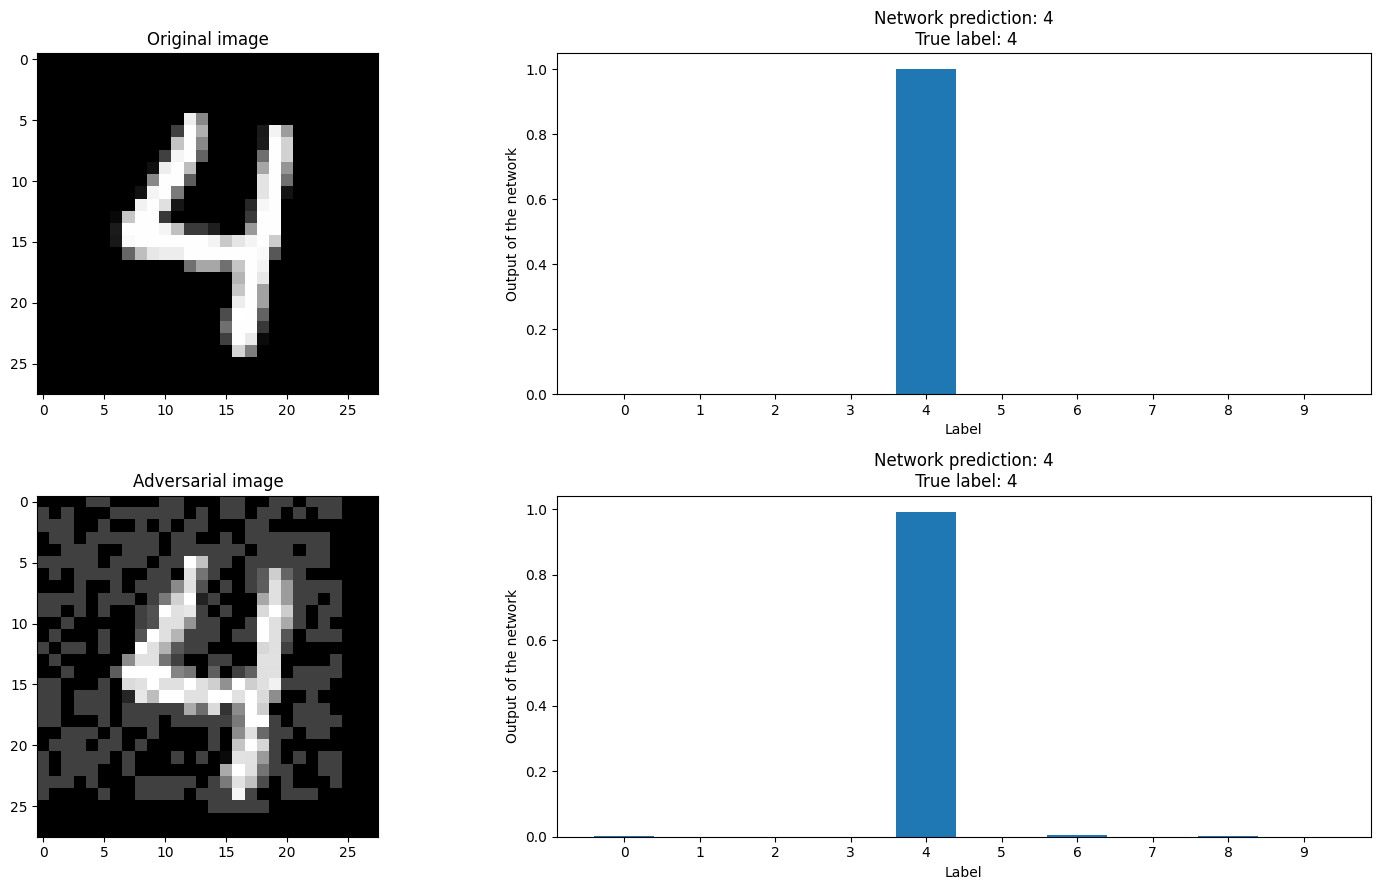

In [ ]:
#DO NOT MODIFY

i = np.random.randint(np.shape(X_test)[0])

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(221)
ax1.imshow(X_test[i,:,:],cmap = "Greys_r")
plt.title("Original image")

ax2 = plt.subplot(222)
ax2.bar(np.arange(10),height = pred_cur[i],tick_label = np.arange(10))
plt.xlabel("Label")
plt.ylabel("Output of the network")
plt.title("Network prediction: " + str(np.argmax(pred_cur,axis = 1)[i]) + "\n True label: " + str(Y_test[i]))

ax3 = plt.subplot(223)
ax3.imshow(x_adv[i,:,:],cmap = "Greys_r")
plt.title("Adversarial image")

ax4 = plt.subplot(224)
ax4.bar(np.arange(10),height = pred_adv[i],tick_label = np.arange(10))
plt.xlabel("Label")
plt.ylabel("Output of the network")
plt.title("Network prediction: " + str(np.argmax(pred_adv,axis = 1)[i]) + "\n True label: " + str(Y_test[i]))

plt.tight_layout()

**Exercise**: For the different lambd values below, calculate the accuracy of your neural network on the test set under attack. Complete the following loop at each iteration:
- Calculate the adversarial examples of the test set according to the lambd_cur amplitude.
- Predict the model on these adversarial examples
- Calculate the accuracy of the model and store it in accuracy_tab

In [ ]:
lambd_vec = np.linspace(0,1,50)

accuracy_tab = lambd_vec*0.

for i in range(np.size(lambd_vec)):

    lambd_cur = lambd_vec[i]
    delta = delta_fgsm(X_test, Y_test, model, lambd_cur)

    x_adv = X_test + lambd_cur * tf.sign(delta)
    x_adv = np.clip(x_adv, 0., 1.)

    pred_adv = model.predict(x_adv)

    accuracy_tab[i] = np.sum(np.argmax(pred_adv,axis = 1) == Y_test) / Y_test.shape[0]

    print(i)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
3
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
4
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
6
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
7
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
8
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
9
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
11
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
14
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
16
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
17
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
18
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
21
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2

Below is the evolution of the accuracy of the model as a function of the lambda value.

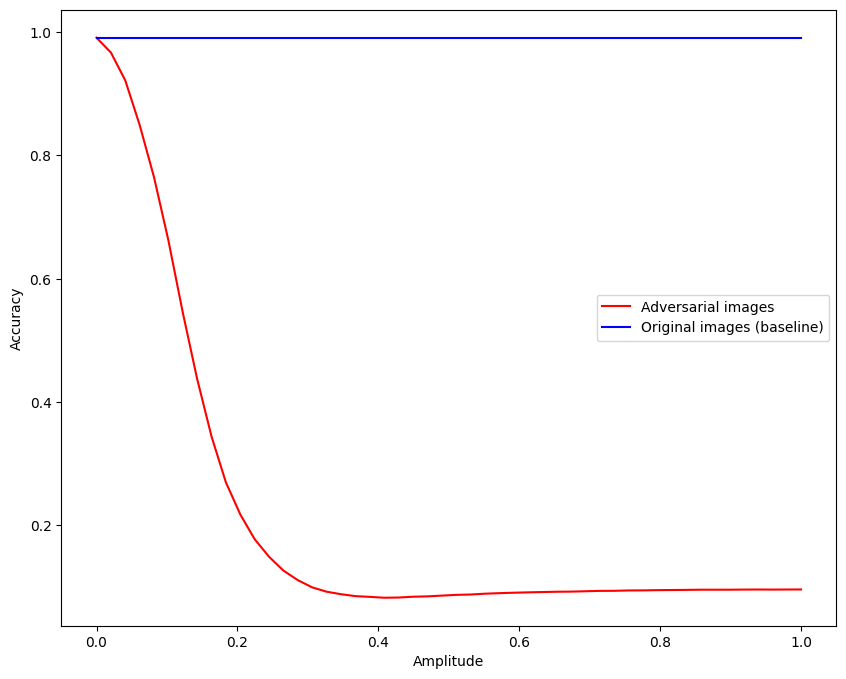

In [ ]:
#DO NOT MODIFY

figure = plt.figure(figsize = (10,8))

plt.plot(lambd_vec,accuracy_tab,label = "Adversarial images",color = "red")
plt.plot(lambd_vec,accuracy_tab[0] + accuracy_tab*0,label = "Original images (baseline)",color = "blue")
plt.xlabel("Amplitude")
plt.ylabel("Accuracy")
plt.legend()

### Adversarial learning

We will set up an adversarial training procedure. For each training period, this consists of calculating the adversarial examples and training the model on these adversarial examples.

**Exercise**: Complete the following function so that at each iteration :
- calculate the adversarial examples on the training base (don't forget the clip between 0 and 1)
- learn the model based on the new training data. A single epoch in each iteration of the loop should suffice.

If the learning process is too slow, don't hesitate to stop it whenever you like.

In [ ]:
N_epochs = 100

lambd_vec = np.linspace(0.1,1,10)

delta_train = delta_fgsm(X_train, Y_train, model, 1)

for i in range(N_epochs):

  for lambd in lambd_vec:

    x_adv = X_train + lambd * delta_train
    x_adv = np.clip(x_adv, 0., 1.)

    model.fit(x_adv, Y_train_cat, epochs=1, batch_size=128, verbose=1)


469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - categorical_accuracy: 0.8523 - loss: 0.8024
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - categorical_accuracy: 0.9151 - loss: 0.4462
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - categorical_accuracy: 0.9470 - loss: 0.3198
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - categorical_accuracy: 0.9471 - loss: 0.3148
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - categorical_accuracy: 0.9369 - loss: 0.3637
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - categorical_accuracy: 0.9362 - loss: 0.3700
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - categorical_accuracy: 0.9464 - loss: 0.3352
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - categorical_accuracy: 0.9483 - loss: 0.3309
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - categorical_accuracy: 0.9473 - loss: 0.3334
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - categorical_accuracy: 0.9049 - loss: 0.5049
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - categorical_accuracy: 0.8061 - loss: 1.0427
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms

**Exercise**: Proceed with the evaluation of your new model: first calculate the new perturbations for alpha = 1 then vary the lambd amplitude in the loop to apply the perturbations with these different amplitudes and calculate the accuracy at each amplitude, which you will store in accuracy_tab_robuste.

In [ ]:
lambd_vec = np.linspace(0,1,50)

accuracy_tab_robuste = lambd_vec*0.

alpha = 1.

delta = #TO DO

for i in range(np.size(lambd_vec)):

    lambd_cur = lambd_vec[i]

    #TO DO ....

    accuracy_tab_robuste[i] = #TO DO

    print(i)

See below for the accuracy gains on the opposing examples.

In [ ]:
#DO NOT MODIFY

figure = plt.figure(figsize = (10,8))

plt.plot(lambd_vec,accuracy_tab[0] + accuracy_tab*0,label = "Original images on previous model (baseline)",color = "blue")
plt.plot(lambd_vec,accuracy_tab,label = "Adversarial images on previous model (baseline)",color = "red")
plt.plot(lambd_vec,accuracy_tab_robuste[0] + accuracy_tab*0,label = "Original images on new model",color = "purple")
plt.plot(lambd_vec,accuracy_tab_robuste,label = "Adversarial images on new model",color = "orange")

plt.xlabel("Amplitude")
plt.ylabel("Accuracy")
plt.legend()

## Possible following steps

You can repeat this exercise with new data. You can also change the attack algorithm, which here consists of a single gradient iteration, but you can also apply a gradient descent in several steps.